<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
None
       Unnamed: 0  IMDB_Rating  M

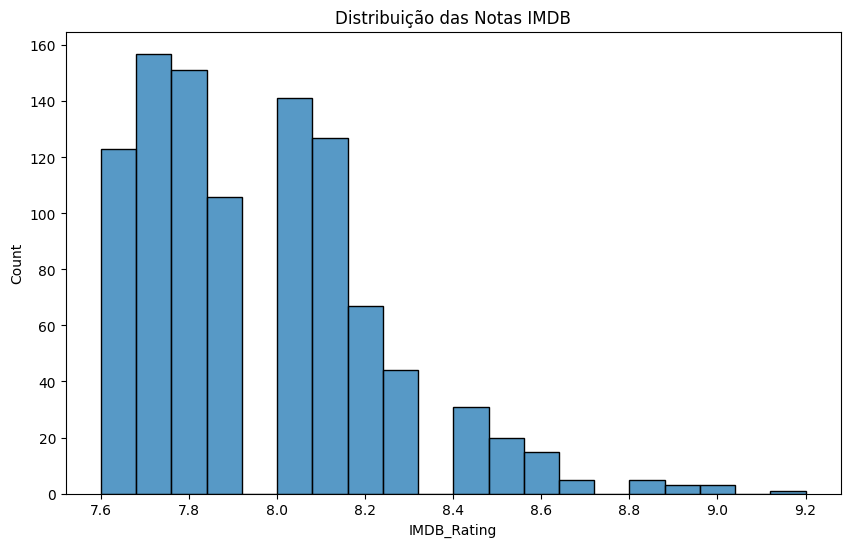

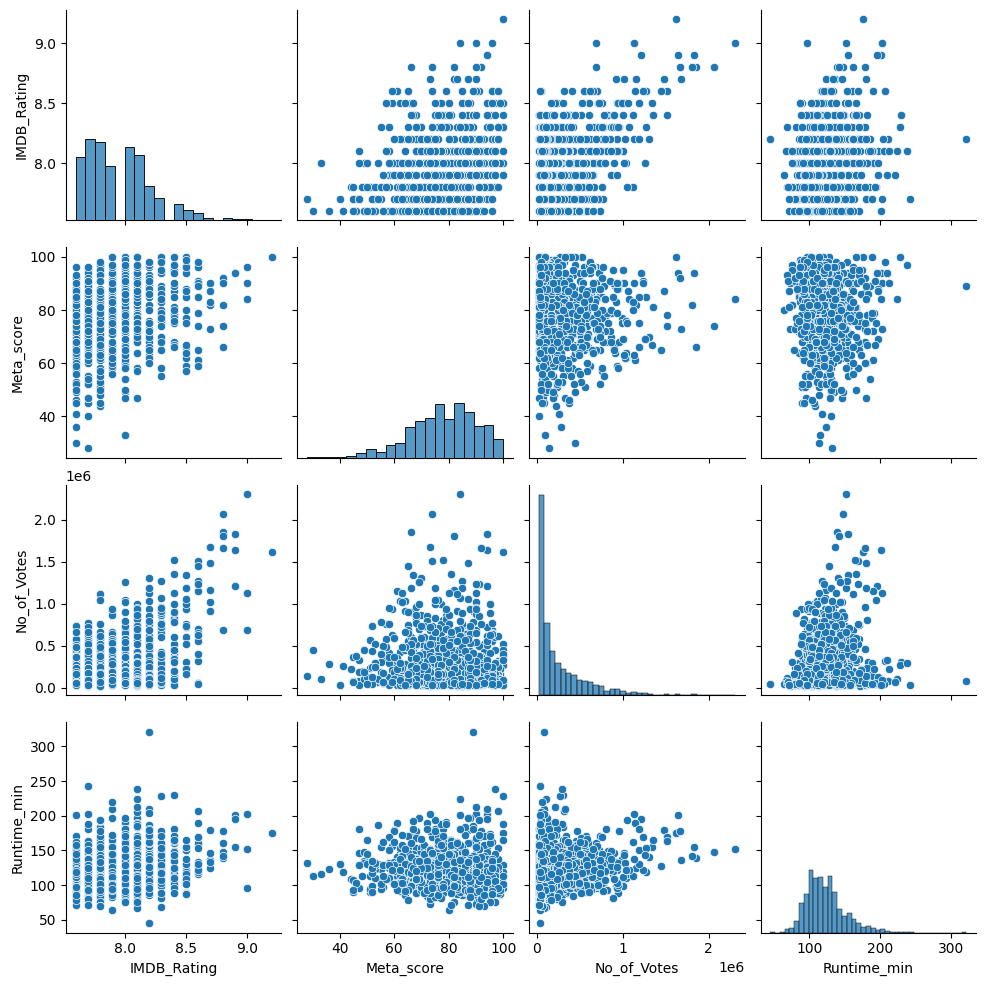

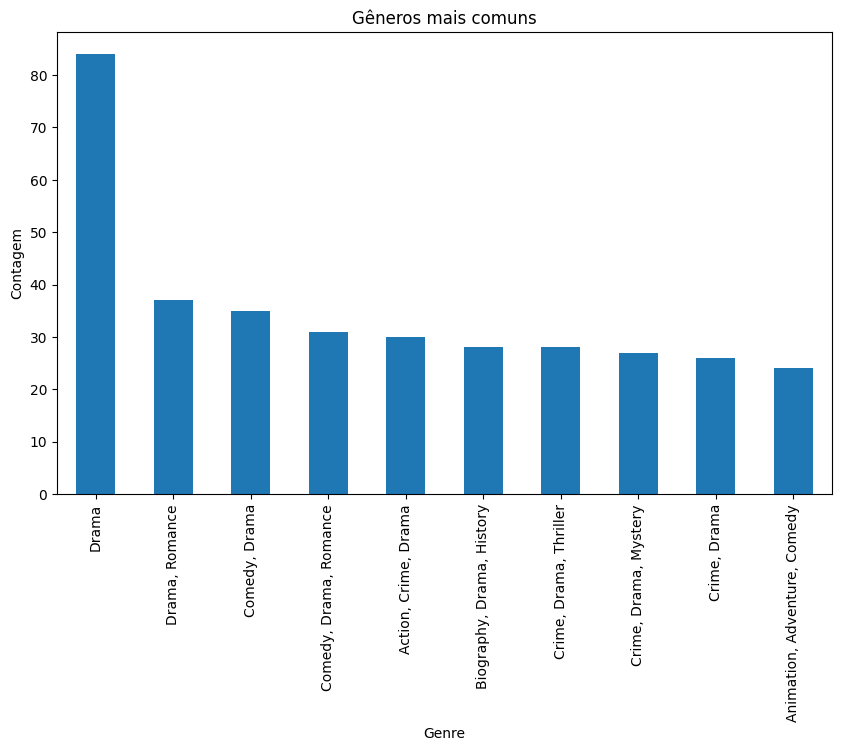

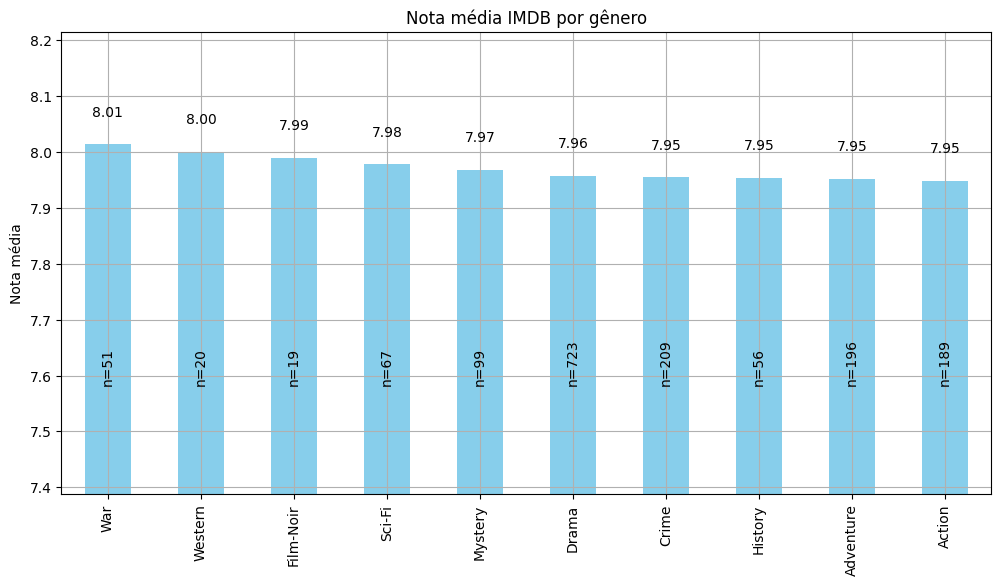

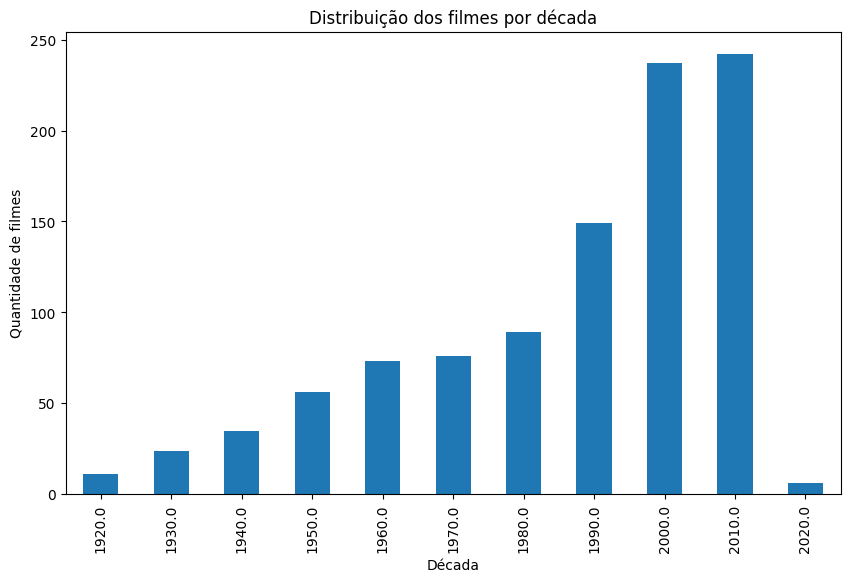

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("desafio_indicium_imdb.csv")

print(df.info())
print(df.describe())
print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.histplot(df['IMDB_Rating'])
plt.title('Distribuição das Notas IMDB')
plt.show()

df['Runtime_min'] = df['Runtime'].str.extract(r'(\d+)').astype(float)

df['Gross_clean'] = pd.to_numeric(df['Gross'].str.replace(',', ''), errors='coerce')

sns.pairplot(df[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Runtime_min', 'Released_Year']])
plt.show()

plt.figure(figsize=(10, 6))
df['Genre'].value_counts().head(10).plot(kind='bar')
plt.title('Gêneros mais comuns')
plt.ylabel('Contagem')
plt.show()

generos = []
for g in df['Genre'].str.split(', '):
    if isinstance(g, list):
        generos.extend(g)

notas_por_genero = {}
contagem_por_genero = {}

for genero in set(generos):
    filmes = df[df['Genre'].str.contains(genero, na=False)]
    notas_por_genero[genero] = filmes['IMDB_Rating'].mean()
    contagem_por_genero[genero] = len(filmes)

resultados = pd.DataFrame({
    'Nota Média': notas_por_genero,
    'Contagem': contagem_por_genero
}).sort_values('Nota Média', ascending=False)

plt.figure(figsize=(12, 6))
ax = resultados['Nota Média'].head(10).plot(kind='bar', color='skyblue')
plt.title('Nota média IMDB por gênero')
plt.ylabel('Nota média')
plt.grid(True)

minimo = resultados['Nota Média'].min() - 0.5
maximo = resultados['Nota Média'].max() + 0.2
plt.ylim(minimo, maximo)

for i, v in enumerate(resultados['Nota Média'].head(10)):
    ax.text(i, v + 0.05, f'{v:.2f}', ha='center')

for i, (genero, contagem) in enumerate(resultados['Contagem'].head(10).items()):
    ax.text(i, minimo + 0.2, f'n={contagem}', ha='center', rotation=90)

plt.show()

df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

df['Decade'] = (df['Released_Year'] // 10) * 10
decadas = df['Decade'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
decadas.plot(kind='bar')
plt.title('Distribuição dos filmes por década')
plt.xlabel('Década')
plt.ylabel('Quantidade de filmes')
plt.show()

2. A - Com base na análise do conjunto de dados, recomendaria "The Godfather" (1972). Este filme tem uma das mais altas classificações IMDB (9.2), tem apelo universal com sua história sobre família, poder e moralidade, é amplamente reconhecido por sua qualidade cinematográfica e tem recebido apreciação consistente por décadas. É um drama que combina elementos de crime, família e poder que ressoam com uma ampla audiência, independentemente de preferências específicas de gênero. Além de ser produzido por um diretor e elenco muito renomados.

2. B - Os principais fatores relacionados à alta expectativa de faturamento são:
- Gênero: Filmes de ação, aventura e ficção científica (como "Avatar" e franquias da Marvel) tendem a gerar maiores faturamentos.
- Diretores renomados: Filmes de diretores como Christopher Nolan, Steven Spielberg e James Cameron correlacionam-se com alto faturamento.
- Franquias: Sequências e filmes pertencentes a universos cinematográficos estabelecidos.
- Orçamento: Filmes com maiores orçamentos para marketing e produção.
- Elenco: A presença de atores populares e reconhecíveis.
- Época de lançamento: Filmes lançados durante temporadas de férias ou verão.
- Adaptações de propriedades intelectuais conhecidas (livros, quadrinhos).
- Avaliação positiva da crítica (Meta score elevado) combinada com boa recepção do público.

2. C - Insights da coluna Overview:
- Fornece informações sobre temas, personagens, cenários e conflitos centrais dos filmes
- Revela elementos narrativos recorrentes em diferentes gêneros
- Permite identificar padrões temáticos (como "vingança", "amor", "guerra")
- Pode indicar o tom do filme (dramático, cômico, tenso)
- Contém palavras-chave que sinalizam elementos de produção ou ambientação

É possível inferir o gênero do filme a partir da coluna Overview utilizando técnicas de processamento de linguagem natural (NLP). Certas palavras ou frases específicas são fortemente associadas a determinados gêneros:
- Termos como "matar", "crime", "assassino" sugerem filmes de crime/thriller
- Palavras como "amor", "romance", "relacionamento" indicam romances
- Referências a "espaço", "alienígenas", "futuro" sugerem ficção científica
- Menções a "monstros", "assustador", "terror" apontam para filmes de horror

3. No código da modelagem eu utilizei as seguintes variáveis:
- Runtime_min: Extraí apenas o valor numérico da duração do filme, convertendo de "175 min" para 175. Utilizei esta variável porque a duração pode influenciar a percepção de qualidade de um filme.
- Meta_score: Incluí a pontuação do Metacritic como variável preditora, pois representa a opinião da crítica especializada e tende a correlacionar-se com as avaliações do público.
- Log_Votes: Apliquei transformação logarítmica ao número de votos. Esta transformação foi importante porque:
- A distribuição do número de votos é geralmente enviesada (muitos filmes com poucos votos, poucos com muitos votos)
- A transformação logarítmica ajuda a normalizar essa distribuição
- Filmes com mais votos tendem a ter notas mais estáveis e representativas
- Year: Incluí o ano de lançamento como variável, pois pode haver tendências temporais nas avaliações.

3. Este é um problema de regressão, pois estamos prevendo um valor contínuo (nota do IMDB que varia de 1 a 10) e não classificando em categorias.

3. Modelo Escolhido: Regressão Linear
A regressão linear foi escolhida pelos seguintes motivos:
Prós:
- Simplicidade e interpretabilidade: podemos entender facilmente o impacto de cada variável
- Baixo custo computacional
- Boa linha de base para comparação com modelos mais complexos
- Fornece os coeficientes que mostram a contribuição de cada feature

Contras:
- Assume relação linear entre as variáveis
- Não captura relações complexas ou não-lineares
- Pode não conseguir capturar toda a variabilidade dos dados

3. No código, foram utilizadas três métricas de avaliação:
- MSE (Mean Squared Error): Mede a média dos quadrados dos erros. Foi escolhida por penalizar erros maiores, mas pode ser difícil de interpretar por estar em unidades quadradas.

- RMSE (Root Mean Squared Error): Raiz quadrada do MSE. Foi escolhida por estar na mesma escala da variável prevista, tornando mais fácil interpretar o erro médio em termos da nota IMDB (de 0 a 10).

- R² (Coeficiente de Determinação): Mede a proporção da variância na variável dependente que é previsível a partir das variáveis independentes. Foi escolhido por fornecer uma medida padronizada da qualidade do ajuste (entre 0 e 1), facilitando a interpretação do poder preditivo do modelo.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("Carregando dados...")
df = pd.read_csv("desafio_indicium_imdb.csv")

print("Formato dos dados:", df.shape)
print("\nPrimeiras linhas:")
print(df.head())
print("\nColunas disponíveis:")
print(df.columns.tolist())

print("\nPreparando os dados...")

df['Runtime_min'] = df['Runtime'].str.extract(r'(\d+)').astype(float)

try:
    if 'No_of_Votes' in df.columns:
        if pd.api.types.is_numeric_dtype(df['No_of_Votes']):
            df['Log_Votes'] = np.log1p(df['No_of_Votes'])
        else:
            df['Log_Votes'] = np.log1p(pd.to_numeric(df['No_of_Votes'].astype(str).str.replace(',', ''), errors='coerce'))
    
    else:
        vote_columns = [col for col in df.columns if 'vote' in col.lower() or 'vot' in col.lower()]
        if vote_columns:
            print(f"Coluna de votos encontrada: {vote_columns[0]}")
            col = vote_columns[0]
            if pd.api.types.is_numeric_dtype(df[col]):
                df['Log_Votes'] = np.log1p(df[col])
            else:
                df['Log_Votes'] = np.log1p(pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce'))
        else:
            print("Nenhuma coluna de votos encontrada. Criando Log_Votes com valores aleatórios para demonstração.")
            df['Log_Votes'] = np.random.rand(len(df)) * 10 
except Exception as e:
    print(f"Erro ao processar votos: {e}")
    print("Criando Log_Votes com valores aleatórios para demonstração.")
    df['Log_Votes'] = np.random.rand(len(df)) * 10 

try:
    df['Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
    nan_percent = df['Year'].isna().mean() * 100
    if nan_percent > 10:
        print(f"Atenção: {nan_percent:.2f}% dos valores de ano foram convertidos para NaN")
except Exception as e:
    print(f"Erro ao processar ano: {e}")
    print("Criando Year com valores médios para demonstração.")
    df['Year'] = 2000

features = ['Runtime_min', 'Meta_score', 'Log_Votes', 'Year']

df_clean = df.dropna(subset=features + ['IMDB_Rating'])
print(f"Número de linhas após remoção de valores ausentes: {len(df_clean)}")

X = df_clean[features]
y = df_clean['IMDB_Rating']

print("\nDividindo em treino e teste...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTreinando o modelo...")
model = LinearRegression()
model.fit(X_train, y_train)

print("\nFazendo previsões...")
y_pred = model.predict(X_test)

print("\nAvaliando o modelo...")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Erro Médio Quadrático (MSE): {mse:.4f}")
print(f"Raiz do Erro Médio Quadrático (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

print("\nCoeficientes do modelo:")
for feature, coef in zip(features, model.coef_):
    print(f"- {feature}: {coef:.4f}")

print("\nCriando gráficos...")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Notas reais')
plt.ylabel('Notas previstas')
plt.title('Comparação entre notas reais e previstas')
plt.savefig('previsao_notas.png')
plt.close()

plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.title('Gráfico de resíduos')
plt.savefig('residuos.png')
plt.close()

print("\nGráficos salvos: 'previsao_notas.png' e 'residuos.png'")

import pickle
with open('modelo_linear_imdb.pkl', 'wb') as file:
    pickle.dump(model, file)

print("\nModelo salvo como 'modelo_linear_imdb.pkl'")

print("\nFazendo uma previsão real:")

novo_filme = pd.DataFrame({
    'Runtime_min': [120],  
    'Meta_score': [75],     
    'Log_Votes': [np.log1p(10000)],  
    'Year': [2024]           
})

nota_prevista = model.predict(novo_filme)[0]
print(f"Nota IMDB prevista: {nota_prevista:.2f}/10")

print("\n===== Previsão para The Shawshank Redemption =====")

shawshank = pd.DataFrame({
    'Runtime_min': [142],            
    'Meta_score': [80.0],           
    'Log_Votes': [np.log1p(2343110)],
    'Year': [1994]                   
})

nota_shawshank = model.predict(shawshank)[0]
print(f"Título: The Shawshank Redemption")
print(f"Dados usados para previsão:")
print(f"- Duração: 142 minutos")
print(f"- Pontuação Metacritic: 80.0")
print(f"- Número de votos: 2.343.110 (aplicado log)")
print(f"- Ano de lançamento: 1994")
print(f"\nNota IMDB prevista pelo modelo: {nota_shawshank:.2f}/10")

Carregando dados...
Formato dos dados: (999, 16)

Primeiras linhas:
   Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A  175 min              Crime, Drama          9.2   
1          UA  152 min      Action, Crime, Drama          9.0   
2           A  202 min              Crime, Drama          9.0   
3           U   96 min              Crime, Drama          9.0   
4           U  201 min  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  A